In [ ]:
!pip install pandas numpy matplotlib scikit-learn statsmodels tensorflow


Upload CSV to Colab

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

stock_data = pd.read_csv('stock_price.csv')


Saving stock_price.csv to stock_price (1).csv


Data Preprocessing

In [ ]:
# Function to convert volume to numeric by handling 'M' for millions and 'B' for billions
def convert_volume(volume):
    if 'M' in volume:
        return float(volume.replace('M', '')) * 1e6
    elif 'B' in volume:
        return float(volume.replace('B', '')) * 1e9
    else:
        return float(volume)  # In case it's already a numeric string

# Apply the function to '出来高' (Volume)
stock_data['出来高'] = stock_data['出来高'].apply(convert_volume)

# Remove '%' from '変化率 %' (Change Rate) and convert to numeric
stock_data['変化率 %'] = stock_data['変化率 %'].str.replace('%', '').astype(float)

# Sort by date for time-series analysis
stock_data = stock_data.sort_values('日付け').reset_index(drop=True)

# Display the updated dataframe to verify
print(stock_data.head())



          日付け     終値     始値     高値     安値           出来高  変化率 %
0  1987-02-12  182.4  182.4  182.4  182.4  1.280000e+09  16.25
1  1987-02-13  172.5  176.5  176.5  172.5  4.223800e+08  -5.43
2  1987-02-16  175.5  166.7  175.5  165.7  3.605100e+08   1.74
3  1987-02-17  182.4  176.5  184.3  175.5  8.815100e+08   3.93
4  1987-02-18  191.2  186.3  191.2  186.3  7.950900e+08   4.82


Exploratory Data Analysis (EDA)

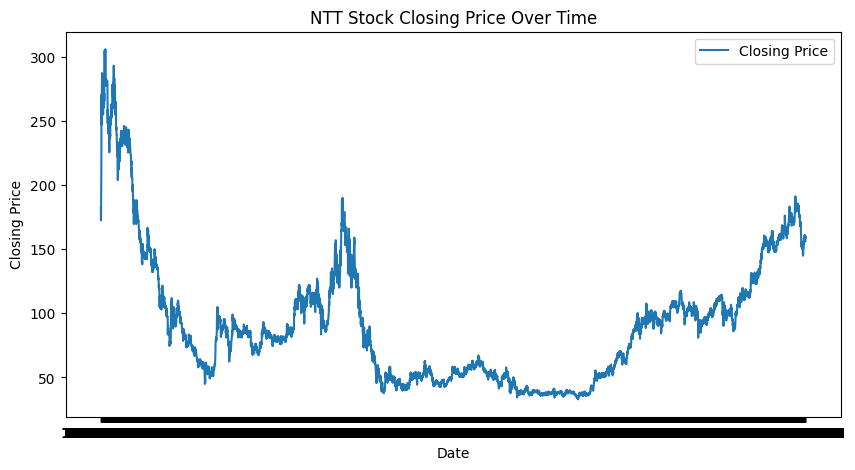

In [ ]:
import matplotlib.pyplot as plt

# Plot Closing Price over time
plt.figure(figsize=(10,5))
plt.plot(stock_data['日付け'], stock_data['終値'], label='Closing Price')
plt.title('NTT Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


Feature Engineering

In [ ]:
# Add moving averages as new features
stock_data['MA_10'] = stock_data['終値'].rolling(window=10).mean()
stock_data['MA_50'] = stock_data['終値'].rolling(window=50).mean()

# Drop missing values (from moving averages)
stock_data = stock_data.dropna()

# Display the data with new features
print(stock_data[['終値', 'MA_10', 'MA_50']].head())


       終値   MA_10    MA_50
49  301.0  279.11  259.906
50  302.9  282.44  262.316
51  299.0  285.97  264.846
52  289.2  288.62  267.120
53  284.3  289.89  269.158


Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Use only numerical columns for prediction (e.g., MA_10, MA_50, and previous '終値')
features = ['MA_10', 'MA_50', '終値']
X = stock_data[features]
y = stock_data['終値']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


Model Training Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 1.206616824466507e-28


Visualize Predictions

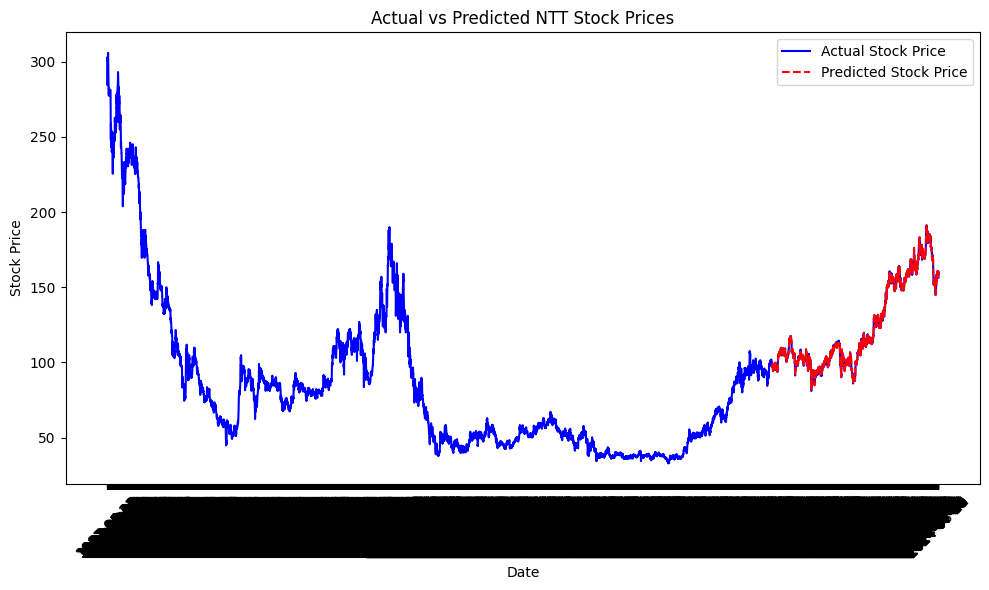

In [ ]:
from sklearn.linear_model import LinearRegression

# Assuming features and target are already created
# Split the data into features (X) and target (y)
X = stock_data[['終値']]  # Using the closing price as a feature (you can use more features)
y = stock_data['終値']    # The target is also the closing price for prediction

# Split into training and testing sets
train_size = int(len(stock_data) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Generate predictions on the test set
predictions = model.predict(X_test)

# Plot the actual and predicted stock prices
plt.figure(figsize=(10, 6))

# Plot the actual stock prices (whole dataset)
plt.plot(stock_data['日付け'], stock_data['終値'], color='blue', label='Actual Stock Price')

# Plot the predicted stock prices (predictions only for test data)
plt.plot(stock_data['日付け'].iloc[train_size:], predictions, color='red', linestyle='dashed', label='Predicted Stock Price')

# Set labels and title
plt.title('Actual vs Predicted NTT Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Train an LSTM Model

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


229/229 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 9187.1387
Epoch 2/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6917.2446
Epoch 3/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5640.5557
Epoch 4/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4655.8125
Epoch 5/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 4110.0410
Epoch 6/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3569.2422
Epoch 7/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3181.8862
Epoch 8/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2753.1038
Epoch 9/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2279.5581
Epoch 10/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2240.9697
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
LSTM Mean Squared Error: 3008.635734152013


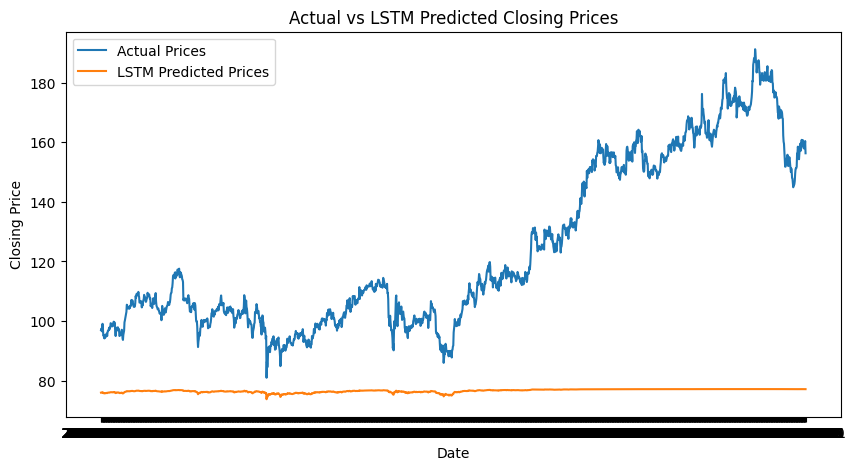

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reshape the data for LSTM (3D input)
X_train_lstm = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=False, input_shape=(X_train_lstm.shape[1], 1)))
model_lstm.add(Dense(1))

# Compile the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model_lstm.fit(X_train_lstm, y_train, epochs=10, batch_size=32)

# Make predictions using the LSTM model
y_pred_lstm = model_lstm.predict(X_test_lstm)

# Calculate Mean Squared Error for LSTM
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
print(f'LSTM Mean Squared Error: {mse_lstm}')

# Plot actual vs LSTM predicted closing prices
plt.figure(figsize=(10,5))
plt.plot(stock_data['日付け'][-len(y_test):], y_test, label='Actual Prices')
plt.plot(stock_data['日付け'][-len(y_pred_lstm):], y_pred_lstm, label='LSTM Predicted Prices')
plt.title('Actual vs LSTM Predicted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


LSTM model improvement


Processed DataFrame head:
         Date  Close   Open   High    Low       Volume  Change
49 1987-04-22  301.0  309.8  311.8  301.0  383150000.0 -0.0128
50 1987-04-23  302.9  302.0  304.9  296.1  172430000.0  0.0063
51 1987-04-24  299.0  305.9  308.8  299.0  223280000.0 -0.0129
52 1987-04-27  289.2  299.0  302.0  289.2  187610000.0 -0.0328
53 1987-04-28  284.3  286.3  292.2  275.5  199910000.0 -0.0169
Epoch 1/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 53s 237ms/step - loss: 0.1457 - val_loss: 0.0089
Epoch 2/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 83s 241ms/step - loss: 0.0198 - val_loss: 0.0033
Epoch 3/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 81s 235ms/step - loss: 0.0097 - val_loss: 0.0040
Epoch 4/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 82s 233ms/step - loss: 0.0060 - val_loss: 6.3265e-04
Epoch 5/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 83s 239ms/step - loss: 0.0048 - val_loss: 0.0011
Epoch 6/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 81s 235ms/step - loss: 0.0037 - val_loss: 8.3597e-04
Epoch 7/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 44s 24

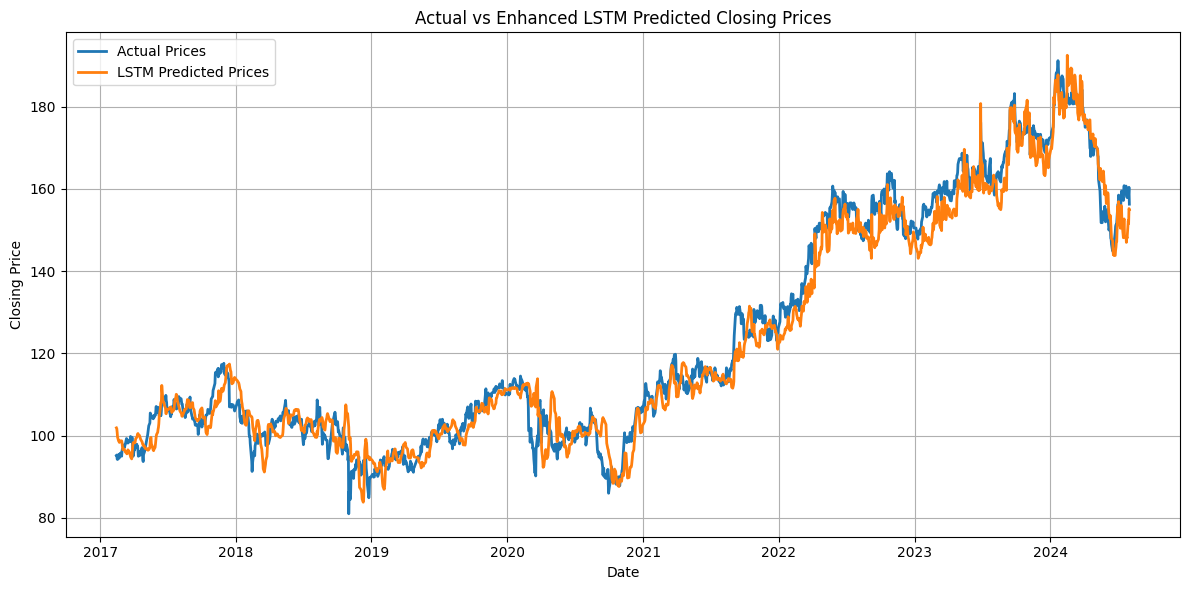

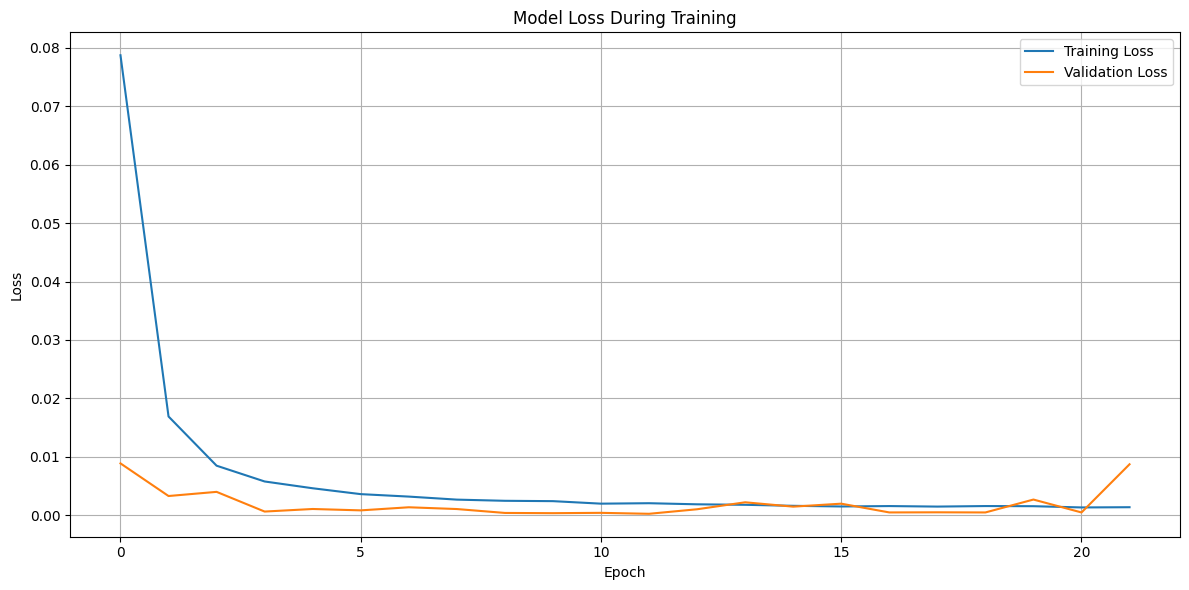

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def prepare_stock_data(df):
    # Make a copy of the dataframe
    df = df.copy()

    # Create a new dataframe with renamed columns for easier processing
    clean_df = pd.DataFrame({
        'Date': df['日付け'],
        'Close': df['終値'],
        'Open': df['始値'],
        'High': df['高値'],
        'Low': df['安値'],
        'Volume': df['出来高'],
        'Change': df['変化率 %']
    })

    # Convert Date column to datetime
    clean_df['Date'] = pd.to_datetime(clean_df['Date'])

    # Convert price and volume columns to numeric
    for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
        clean_df[col] = pd.to_numeric(clean_df[col], errors='coerce')

    # Convert Change (remove '%' if present and convert to decimal)
    clean_df['Change'] = pd.to_numeric(clean_df['Change'], errors='coerce') / 100

    # Drop any rows with NaN values
    clean_df = clean_df.dropna()

    return clean_df

def create_features(df, lookback=30):
    df = df.copy()

    # Technical indicators
    df['Returns'] = df['Close'].pct_change()
    df['MA5'] = df['Close'].rolling(window=5).mean()
    df['MA20'] = df['Close'].rolling(window=20).mean()
    df['RSI'] = calculate_rsi(df['Close'])
    df['MACD'] = calculate_macd(df['Close'])
    df['Volume_MA5'] = df['Volume'].rolling(window=5).mean()

    # Price features
    df['HL_PCT'] = (df['High'] - df['Low']) / df['Low']
    df['PCT_Change'] = (df['Close'] - df['Open']) / df['Open']

    # Create lagged features
    for i in range(1, lookback + 1):
        df[f'Close_Lag_{i}'] = df['Close'].shift(i)
        df[f'Returns_Lag_{i}'] = df['Returns'].shift(i)

    # Drop NaN values
    df = df.dropna()

    return df

def calculate_rsi(prices, periods=14):
    delta = prices.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=periods).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=periods).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

def calculate_macd(prices, slow=26, fast=12):
    exp1 = prices.ewm(span=fast, adjust=False).mean()
    exp2 = prices.ewm(span=slow, adjust=False).mean()
    return exp1 - exp2

def build_lstm_model(input_shape):
    model = Sequential([
        Input(shape=input_shape),  # Explicitly define input shape
        LSTM(units=128, return_sequences=True, recurrent_dropout=0.1),
        BatchNormalization(),
        Dropout(0.2),

        LSTM(units=64, return_sequences=True, recurrent_dropout=0.1),
        BatchNormalization(),
        Dropout(0.2),

        LSTM(units=32, return_sequences=False, recurrent_dropout=0.1),
        BatchNormalization(),
        Dropout(0.2),

        Dense(units=16, activation='relu'),
        Dense(units=1)
    ])
    return model

def prepare_data(stock_data, test_size=0.2, lookback=30):
    # Prepare the stock data
    df = prepare_stock_data(stock_data)
    print("\nProcessed DataFrame head:")
    print(df.head())

    # Create features
    df = create_features(df, lookback)

    # Separate features and target
    feature_columns = [col for col in df.columns if col not in ['Date', 'Close']]
    X = df[feature_columns]
    y = df['Close']

    # Split the data
    split_idx = int(len(df) * (1 - test_size))

    X_train = X[:split_idx]
    X_test = X[split_idx:]
    y_train = y[:split_idx]
    y_test = y[split_idx:]

    return X_train, X_test, y_train, y_test, df

def main():
    # Create scalers
    price_scaler = MinMaxScaler(feature_range=(0, 1))
    feature_scaler = MinMaxScaler(feature_range=(0, 1))

    # Prepare the data
    X_train, X_test, y_train, y_test, processed_df = prepare_data(stock_data)

    # Scale the data
    y_train_scaled = price_scaler.fit_transform(y_train.values.reshape(-1, 1))
    y_test_scaled = price_scaler.transform(y_test.values.reshape(-1, 1))
    X_train_scaled = feature_scaler.fit_transform(X_train)
    X_test_scaled = feature_scaler.transform(X_test)

    # Reshape data for LSTM
    X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
    X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

    # Build LSTM model
    model_lstm = build_lstm_model(input_shape=(X_train_lstm.shape[1], 1))

    # Compile model
    optimizer = Adam(learning_rate=0.001)
    model_lstm.compile(optimizer=optimizer, loss='huber')

    # Setup callbacks
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )

    model_checkpoint = ModelCheckpoint(
        'best_lstm_model.keras',  # Changed from .h5 to .keras
        monitor='val_loss',
        save_best_only=True
    )

    # Train the model
    history = model_lstm.fit(
        X_train_lstm,
        y_train_scaled,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stopping, model_checkpoint],
        verbose=1
    )

    # Make predictions
    y_pred_lstm_scaled = model_lstm.predict(X_test_lstm)
    y_pred_lstm = price_scaler.inverse_transform(y_pred_lstm_scaled)

    # Calculate Mean Squared Error
    mse_lstm = mean_squared_error(y_test, y_pred_lstm)
    print(f'LSTM Mean Squared Error: {mse_lstm}')

    # Plot results
    plt.figure(figsize=(12, 6))
    plt.plot(processed_df['Date'][-len(y_test):], y_test, label='Actual Prices', linewidth=2)
    plt.plot(processed_df['Date'][-len(y_pred_lstm):], y_pred_lstm, label='LSTM Predicted Prices', linewidth=2)
    plt.title('Actual vs Enhanced LSTM Predicted Closing Prices')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot training history
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss During Training')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

Improving the LSTM model


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0247
Epoch 2/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.2914e-04
Epoch 3/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.2029e-04
Epoch 4/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3.8344e-04
Epoch 5/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 4.2062e-04
Epoch 6/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.0755e-04
Epoch 7/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.6695e-04
Epoch 8/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.4883e-04
Epoch 9/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.5386e-04
Epoch 10/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.0617e-04
Epoch 11/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.8122e-04
Epoch 12/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.4354e-04
Epoch 13/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3.4738e-04
Epoch 14/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 3.0001e-04
Epoch

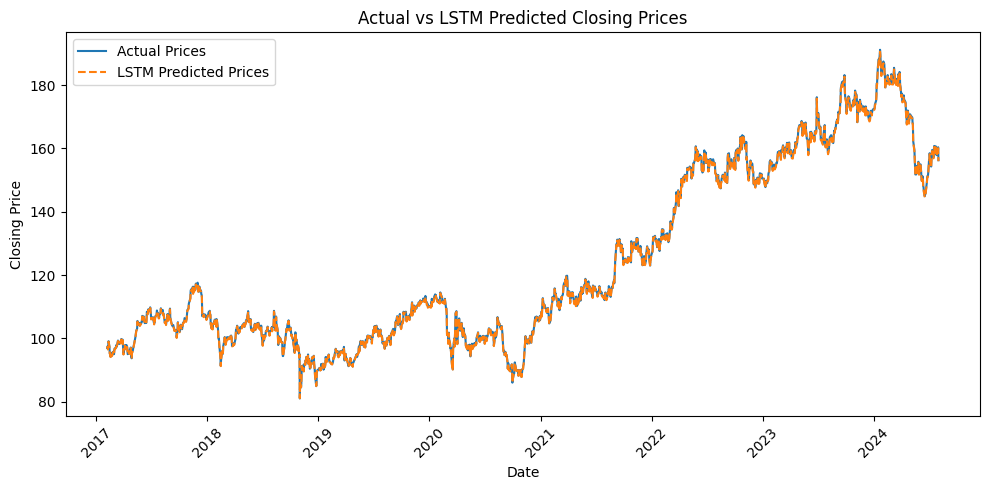

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load your stock data
# Assuming stock_data is a DataFrame with columns '日付け' (Date) and '終値' (Closing Price)
# stock_data = pd.read_csv('your_file.csv')

# Set the date column as index
stock_data['日付け'] = pd.to_datetime(stock_data['日付け'])
stock_data.set_index('日付け', inplace=True)

# Feature Scaling
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

# Feature and target columns
X = stock_data[['終値']]
y = stock_data['終値']

# Scale the data
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(np.array(y).reshape(-1, 1))

# Train-test split (you can adjust train_size based on your data)
train_size = int(len(X) * 0.8)
X_train_scaled, X_test_scaled = X_scaled[:train_size], X_scaled[train_size:]
y_train_scaled, y_test_scaled = y_scaled[:train_size], y_scaled[train_size:]

# Reshape the data for LSTM (LSTM expects 3D input: samples, timesteps, features)
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the LSTM model
model_lstm = Sequential()

# First LSTM layer
model_lstm.add(LSTM(units=100, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)))
model_lstm.add(Dropout(0.2))

# Second LSTM layer
model_lstm.add(LSTM(units=50, return_sequences=False))
model_lstm.add(Dropout(0.2))

# Output layer
model_lstm.add(Dense(1))

# Compile the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model_lstm.fit(X_train_lstm, y_train_scaled, epochs=50, batch_size=32)

# Make predictions
y_pred_lstm_scaled = model_lstm.predict(X_test_lstm)

# Inverse scale the predicted data to get the original price range
y_pred_lstm = scaler_y.inverse_transform(y_pred_lstm_scaled)
y_test = scaler_y.inverse_transform(y_test_scaled)

# Calculate Mean Squared Error for LSTM
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
print(f'LSTM Mean Squared Error: {mse_lstm}')

# Plot actual vs LSTM predicted closing prices
plt.figure(figsize=(10,5))
plt.plot(stock_data.index[-len(y_test):], y_test, label='Actual Prices')
plt.plot(stock_data.index[-len(y_pred_lstm):], y_pred_lstm, label='LSTM Predicted Prices', linestyle='dashed')
plt.title('Actual vs LSTM Predicted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


ARIMA Model

Index(['終値', '始値', '高値', '安値', '出来高', '変化率 %', 'MA_10', 'MA_50'], dtype='object')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

ARIMA Mean Squared Error: 1487.072132691916


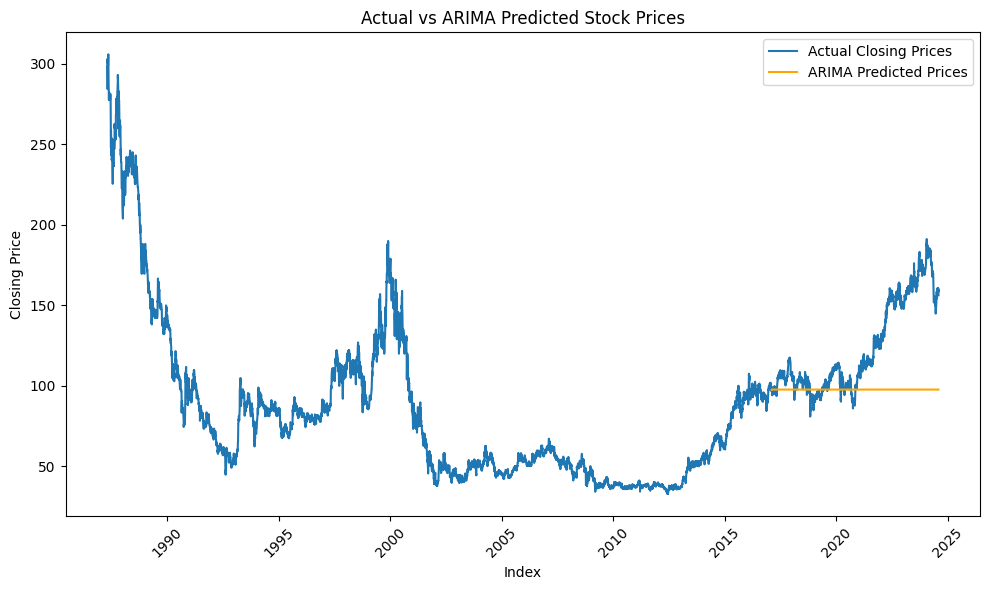

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Load your data into a DataFrame named stock_data
# stock_data = pd.read_csv('your_data.csv')  # Uncomment and adjust this line to load your data

# Print column names to check
print(stock_data.columns)

# Use the closing price column directly
closing_prices = stock_data['終値']  # This is your target variable

# Split data into train and test sets
train_size = int(len(closing_prices) * 0.8)
train_data, test_data = closing_prices[:train_size], closing_prices[train_size:]

# Build the ARIMA model
model_arima = ARIMA(train_data, order=(5, 1, 0))  # You can tune the order (p, d, q)
model_arima_fit = model_arima.fit()

# Make predictions
start = len(train_data)
end = len(train_data) + len(test_data) - 1
predictions_arima = model_arima_fit.predict(start=start, end=end, typ='levels')

# Calculate Mean Squared Error
mse_arima = mean_squared_error(test_data, predictions_arima)
print(f'ARIMA Mean Squared Error: {mse_arima}')

# Plot actual vs predicted closing prices
plt.figure(figsize=(10,6))
plt.plot(closing_prices.index, closing_prices, label='Actual Closing Prices')
plt.plot(test_data.index, predictions_arima, label='ARIMA Predicted Prices', color='orange')
plt.title('Actual vs ARIMA Predicted Stock Prices')
plt.xlabel('Index')
plt.ylabel('Closing Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Ensure 'Date' is parsed as a datetime and set as index
stock_data['Date'] = pd.to_datetime(stock_data['日付け'])  # Adjust if necessary
stock_data.set_index('Date', inplace=True)

# Check if there are any missing values and fill or drop them as needed
stock_data = stock_data.dropna()  # Or use .fillna() to fill missing values

# Split the data into training and testing sets
train_data = stock_data[:int(len(stock_data) * 0.8)]  # 80% for training
test_data = stock_data[int(len(stock_data) * 0.8):]   # 20% for testing

# Check the shape of train_data
print(train_data.shape)
print(train_data.head())


(0, 9)
Empty DataFrame
Columns: [日付け, 終値, 始値, 高値, 安値, 出来高, 変化率 %, MA_10, MA_50]
Index: []


Code with SARIMA

In [ ]:
print(stock_data.head())
print(stock_data.shape)

           日付け     終値     始値     高値     安値          出来高  変化率 %   MA_10  \
49  1987-04-22  301.0  309.8  311.8  301.0  383150000.0  -1.28  279.11   
50  1987-04-23  302.9  302.0  304.9  296.1  172430000.0   0.63  282.44   
51  1987-04-24  299.0  305.9  308.8  299.0  223280000.0  -1.29  285.97   
52  1987-04-27  289.2  299.0  302.0  289.2  187610000.0  -3.28  288.62   
53  1987-04-28  284.3  286.3  292.2  275.5  199910000.0  -1.69  289.89   

      MA_50  
49  259.906  
50  262.316  
51  264.846  
52  267.120  
53  269.158  
(9153, 9)


In [ ]:
!pip install pmdarima

Total observations: 9153
Date range: 1987-04-22 00:00:00 to 2024-08-01 00:00:00
Missing values:
Close             0
Open              0
High              0
Low               0
Volume            0
Change_Percent    0
MA_10             0
MA_50             0
dtype: int64
Prepared data - Total observations: 13617
Date range: 1987-04-22 00:00:00 to 2024-08-01 00:00:00
Missing values: 0

ARIMA Order (p,d,q): (0, 2, 1)
Seasonal Order (P,D,Q,s): (0, 0, 1, 12)
SARIMA Mean Squared Error: 17.88
SARIMA Mean Absolute Error: 3.73


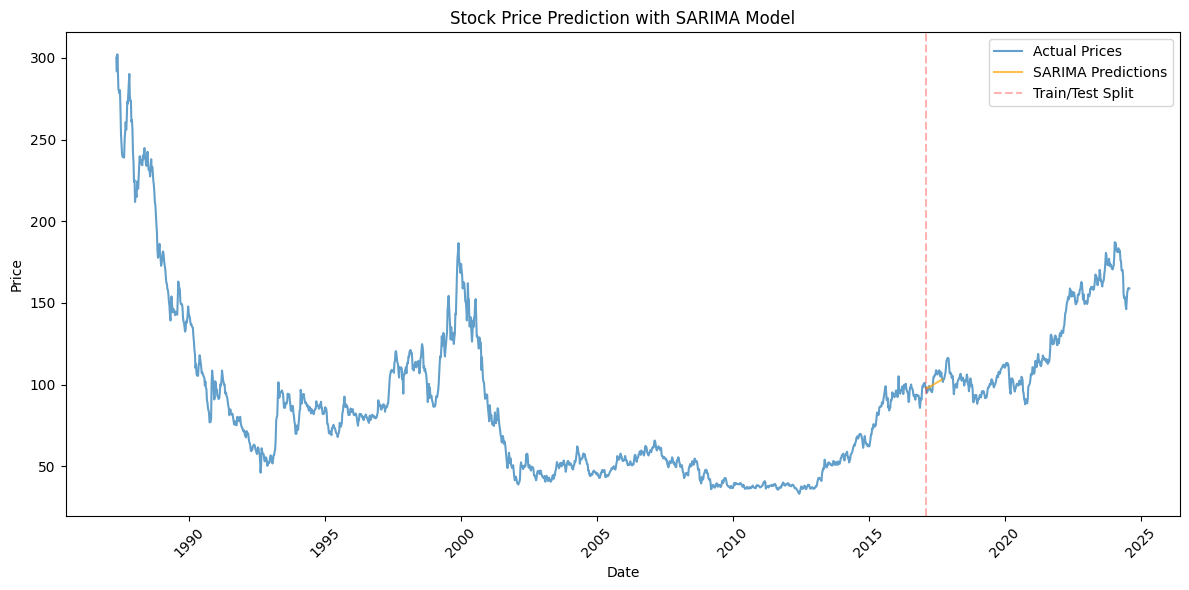

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error

def prepare_stock_data(stock_data):
    column_map = {
        '日付': 'Date',
        '日付け': 'Date',
        '終値': 'Close',
        '始値': 'Open',
        '高値': 'High',
        '安値': 'Low',
        '出来高': 'Volume',
        '変化率 %': 'Change_Percent'
    }

    df = stock_data.rename(columns=column_map)

    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='coerce')
        df.set_index('Date', inplace=True)
    elif not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index, format='%Y-%m-%d', errors='coerce')

    df = df.sort_index()

    print(f"Total observations: {len(df)}")
    print(f"Date range: {df.index.min()} to {df.index.max()}")
    print(f"Missing values:\n{df.isna().sum()}")

    return df

def process_closing_prices(df, price_column='Close'):
    if price_column not in df.columns:
        raise ValueError(f"The specified price column '{price_column}' does not exist in the DataFrame.")

    closing_prices = df[price_column].asfreq('D')
    closing_prices = closing_prices.ffill().bfill()

    print(f"Prepared data - Total observations: {len(closing_prices)}")
    print(f"Date range: {closing_prices.index.min()} to {closing_prices.index.max()}")
    print(f"Missing values: {closing_prices.isna().sum()}")

    return closing_prices

def train_test_split(data, train_size=0.8):
    split_idx = int(len(data) * train_size)
    train = data[:split_idx]
    test = data[split_idx:]
    return train, test

def fit_sarima_model(train_data, test_data):
    if len(train_data) < 2:
        raise ValueError("Training data must contain at least 2 observations")

    # Disable stepwise search to reduce resource usage
    model_auto = auto_arima(train_data,
                            seasonal=True,
                            m=12,
                            trace=False,  # Disable trace for less output
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=False,  # Disable stepwise search
                            random_state=42)

    model_sarima = SARIMAX(train_data,
                           order=model_auto.order,
                           seasonal_order=model_auto.seasonal_order,
                           enforce_stationarity=False,
                           enforce_invertibility=False)

    model_sarima_fit = model_sarima.fit(disp=False)

    # Limit the forecast steps to reduce memory usage
    forecast_steps = min(len(test_data), 30)  # Predict only 30 steps ahead
    predictions = model_sarima_fit.get_forecast(steps=forecast_steps).predicted_mean

    return predictions, model_auto.order, model_auto.seasonal_order

def evaluate_and_plot(actual_data, train_data, test_data, predictions):
    mse = mean_squared_error(test_data[:len(predictions)], predictions)
    mae = mean_absolute_error(test_data[:len(predictions)], predictions)

    print(f'SARIMA Mean Squared Error: {mse:.2f}')
    print(f'SARIMA Mean Absolute Error: {mae:.2f}')

    plt.figure(figsize=(12, 6))
    plt.plot(actual_data.index, actual_data, label='Actual Prices', alpha=0.7)
    plt.plot(test_data.index[:len(predictions)], predictions, label='SARIMA Predictions', color='orange', alpha=0.7)
    plt.axvline(x=train_data.index[-1], color='r', linestyle='--', alpha=0.3, label='Train/Test Split')
    plt.title('Stock Price Prediction with SARIMA Model')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def main(stock_data, price_column='Close'):
    try:
        prepared_data = prepare_stock_data(stock_data)
        closing_prices = process_closing_prices(prepared_data, price_column)

        # Downsample data to reduce memory usage
        closing_prices = closing_prices.resample('W').mean()  # Resample to weekly frequency

        train_data, test_data = train_test_split(closing_prices)

        predictions, order, seasonal_order = fit_sarima_model(train_data, test_data)

        print(f"\nARIMA Order (p,d,q): {order}")
        print(f"Seasonal Order (P,D,Q,s): {seasonal_order}")

        evaluate_and_plot(closing_prices, train_data, test_data, predictions)
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        print("DataFrame info:")
        print(stock_data.info())
        print("\nFirst few rows of the DataFrame:")
        print(stock_data.head())

# Assuming stock_data is already loaded
main(stock_data, price_column='Close')


Prophet Model

In [ ]:
# Step to install necessary library
!pip install datasets

import pandas as pd
import matplotlib.pyplot as plt
import torch
from transformers import TimeSeriesTransformerForPrediction, AutoTokenizer
from datasets import Dataset
from sklearn.preprocessing import MinMaxScaler
import numpy as np

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.7 MB/s eta 0:00:00


In [ ]:
print(stock_data.columns)


Index(['終値', '始値', '高値', '安値', '出来高', '変化率 %', 'MA_10', 'MA_50'], dtype='object')


<ipython-input-18-609260ac31d6>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5o88r4s9/_0v4egjj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5o88r4s9/epx298kb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94415', 'data', 'file=/tmp/tmp5o88r4s9/_0v4egjj.json', 'init=/tmp/tmp5o88r4s9/epx298kb.json', 'output', 'file=/tmp/tmp5o88r4s9/prophet_modelged93cd3/prophet_model-20241009062226.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:22:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
0

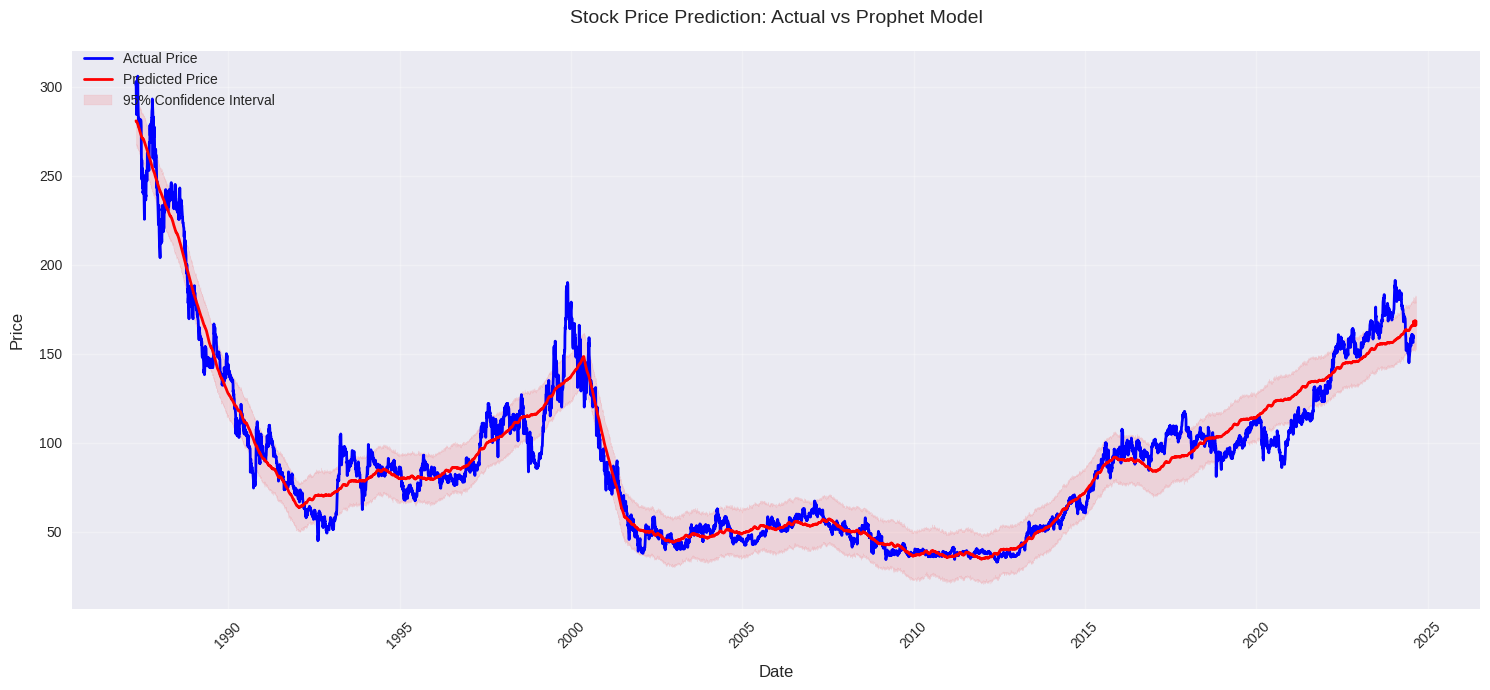


Performance Metrics:
Mean Squared Error: 108.87
Root Mean Squared Error: 10.43
Mean Absolute Error: 7.66
R² Score: 0.9547

Next 30 Days Predictions:
      Date  Predicted Price  Lower Bound  Upper Bound
2024-08-02       165.815698   151.545210   178.760468
2024-08-03       168.103698   154.904538   181.910785
2024-08-04       168.124219   155.230872   180.512481
2024-08-05       165.785112   152.471912   179.447891
2024-08-06       165.928376   151.832267   179.025241
2024-08-07       165.971473   153.028784   178.403785
2024-08-08       166.010249   151.811752   178.945951
2024-08-09       165.978639   152.695823   178.829247
2024-08-10       168.274195   155.383134   181.180391
2024-08-11       168.299165   155.986099   181.517822
2024-08-12       165.961117   152.747519   179.243452
2024-08-13       166.101889   152.993811   178.793695
2024-08-14       166.138912   152.459760   179.776270
2024-08-15       166.168124   152.494660   179.729063
2024-08-16       166.123677   152.079381

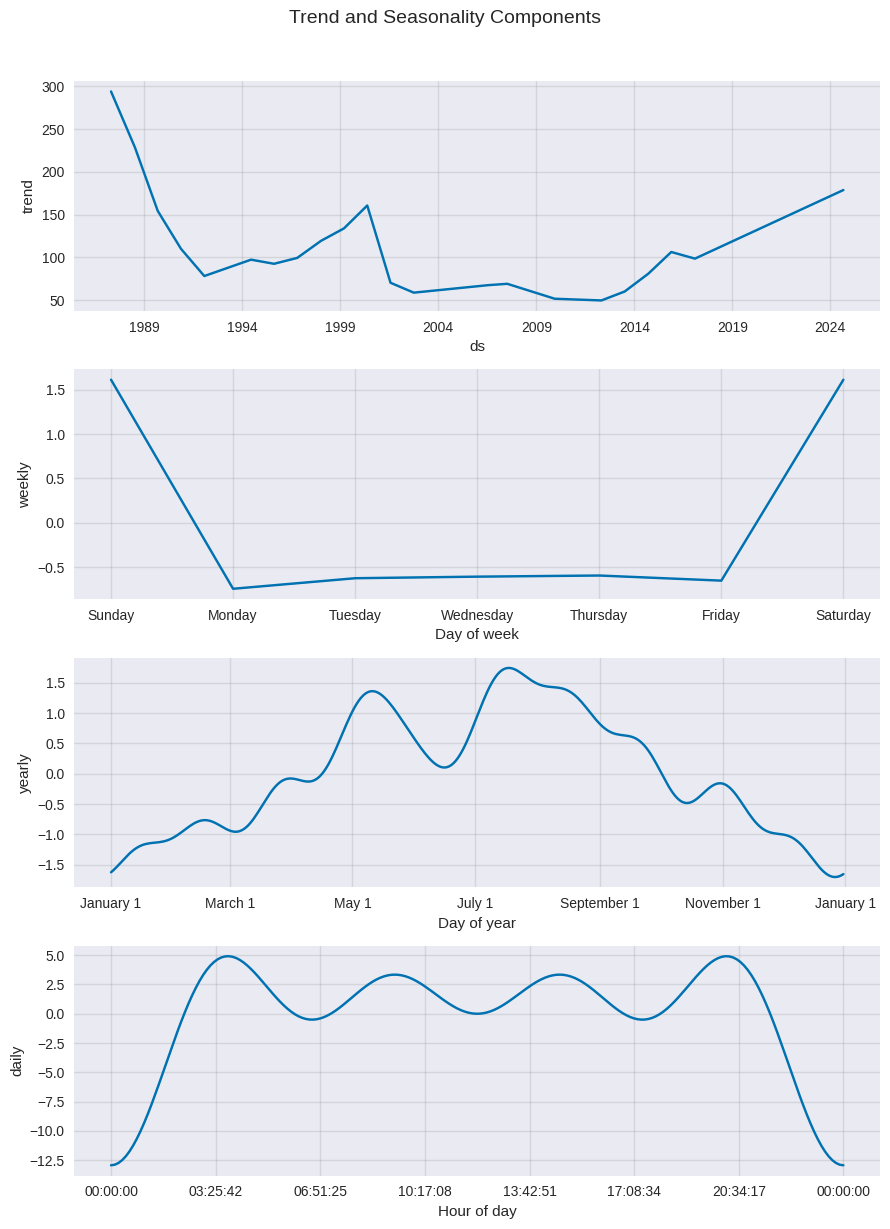

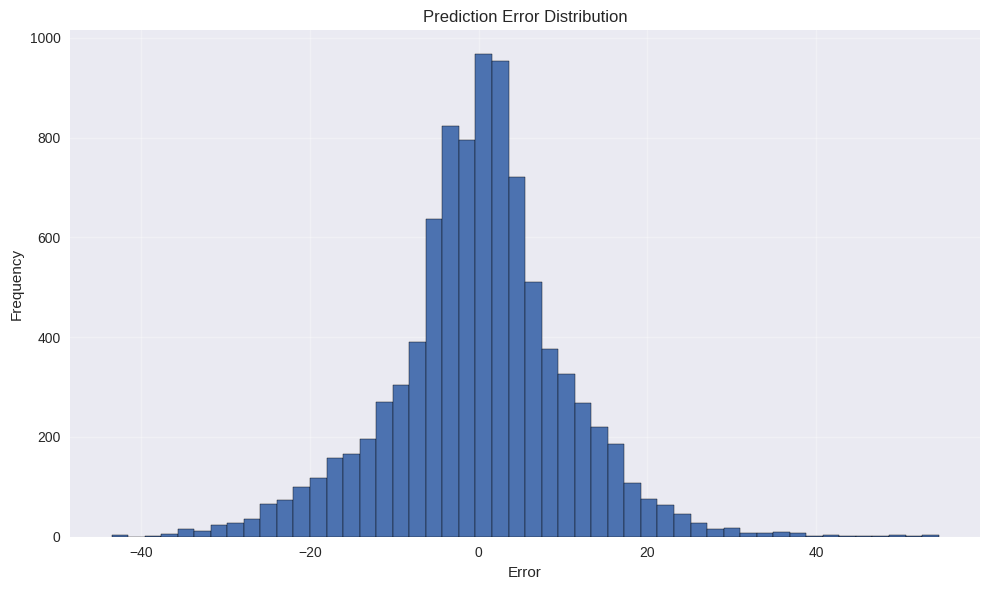

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

# Set basic style for plots
plt.style.use('seaborn')

# Prepare the data for Prophet
# Since '日付け' column is missing, ensure you have a 'Date' column.
# Replace the 'ds' column with proper date column if available.
prophet_data = pd.DataFrame({
    'ds': stock_data.index,  # Use the index or replace with actual date column if available
    'y': stock_data['終値']  # '終値' is the closing price
})

# Create and train the Prophet model
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    changepoint_prior_scale=0.05
)
model.fit(prophet_data)

# Create future dates for prediction
future_dates = model.make_future_dataframe(periods=30)  # Predict 30 days into the future

# Make predictions
forecast = model.predict(future_dates)

# Plot the results
plt.figure(figsize=(15, 7))

# Plot actual values
plt.plot(prophet_data['ds'], prophet_data['y'], label='Actual Price', color='blue', linewidth=2)

# Plot predicted values
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted Price', color='red', linewidth=2)

# Plot confidence intervals
plt.fill_between(forecast['ds'],
                 forecast['yhat_lower'],
                 forecast['yhat_upper'],
                 color='red',
                 alpha=0.1,
                 label='95% Confidence Interval')

plt.title('Stock Price Prediction: Actual vs Prophet Model', pad=20, size=14)
plt.xlabel('Date', labelpad=10, size=12)
plt.ylabel('Price', labelpad=10, size=12)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.02))
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate performance metrics for the historical period
historical_forecast = forecast[forecast['ds'].isin(prophet_data['ds'])]
actual_values = prophet_data['y'].values

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(actual_values, historical_forecast['yhat'])
mae = mean_absolute_error(actual_values, historical_forecast['yhat'])
rmse = np.sqrt(mse)
r2 = r2_score(actual_values, historical_forecast['yhat'])

print('\nPerformance Metrics:')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R² Score: {r2:.4f}')

# Show the future predictions
print("\nNext 30 Days Predictions:")
future_predictions = forecast[len(prophet_data):][['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
future_predictions.columns = ['Date', 'Predicted Price', 'Lower Bound', 'Upper Bound']
print(future_predictions.to_string(index=False))

# Plot components
fig = model.plot_components(forecast)
plt.suptitle('Trend and Seasonality Components', y=1.02, size=14)
plt.tight_layout()
plt.show()

# Additional analysis: Plot prediction error distribution
plt.figure(figsize=(10, 6))
errors = actual_values - historical_forecast['yhat']
plt.hist(errors, bins=50, edgecolor='black')
plt.title('Prediction Error Distribution')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Chronos Model

  Cloning https://github.com/amazon-science/chronos-forecasting.git to /tmp/pip-req-build-beqnq580
  Running command git clone --filter=blob:none --quiet https://github.com/amazon-science/chronos-forecasting.git /tmp/pip-req-build-beqnq580
  Resolved https://github.com/amazon-science/chronos-forecasting.git to commit ac6ee36acee1e47446cd66f72f540c87f1f1fbe4
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


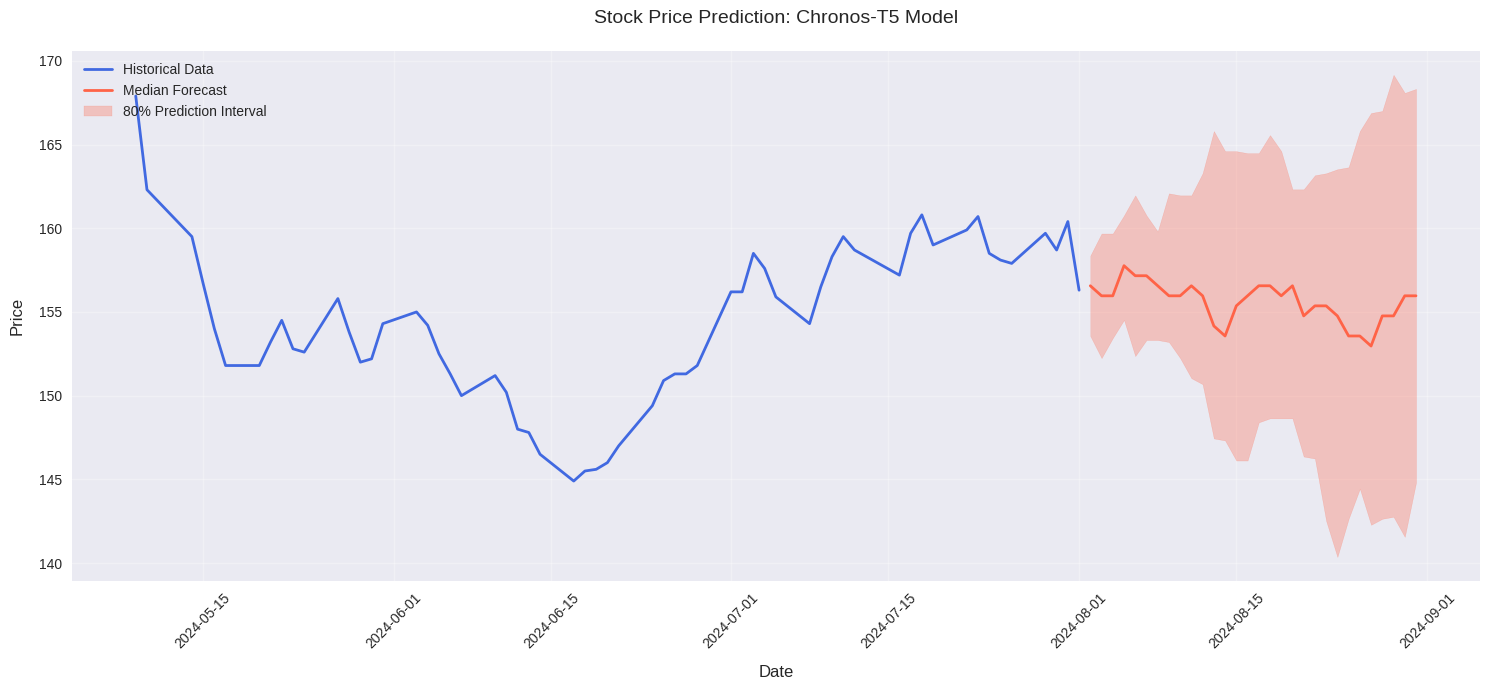


Predictions for the next 30 days:
      Date  Median_Prediction  Lower_Bound  Upper_Bound
2024-08-02         156.564026   153.564713   158.363617
2024-08-03         155.964157   152.245018   159.683311
2024-08-04         155.964157   153.444740   159.683311
2024-08-05         157.763756   154.524490   160.763062
2024-08-06         157.163895   152.364990   161.962784
2024-08-07         157.163895   153.324768   160.763062
2024-08-08         156.564026   153.324768   159.803284
2024-08-09         155.964157   153.204796   162.082756
2024-08-10         155.964157   152.245018   161.962784
2024-08-11         156.564026   151.045296   161.962784
2024-08-12         155.964157   150.685379   163.282478
2024-08-13         154.164574   147.446129   165.801895
2024-08-14         153.564713   147.326155   164.602173
2024-08-15         155.364296   146.126433   164.602173
2024-08-16         155.964157   146.126433   164.482201
2024-08-17         156.564026   148.405905   164.482201
2024-08-18   

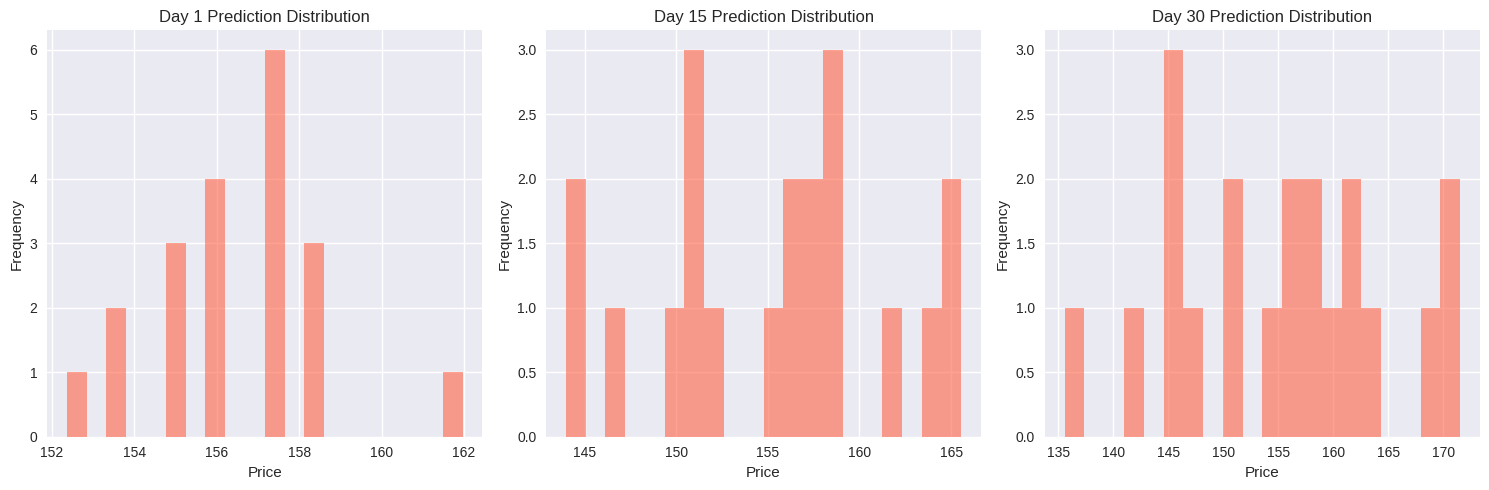

In [ ]:
# Install the chronos-forecasting package
!pip install git+https://github.com/amazon-science/chronos-forecasting.git

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from chronos import ChronosPipeline

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Initialize the Chronos pipeline
pipeline = ChronosPipeline.from_pretrained(
    "amazon/chronos-t5-large",
    device_map="cuda" if torch.cuda.is_available() else "cpu",
    torch_dtype=torch.bfloat16
)

# Ensure that the stock_data index is in datetime format, if it's not already
if not pd.api.types.is_datetime64_any_dtype(stock_data.index):
    stock_data.index = pd.to_datetime(stock_data.index)

# Prepare the context (historical data)
context = torch.tensor(stock_data['終値'].values, dtype=torch.float32)

# Set prediction parameters
prediction_length = 30  # Predict 30 days into the future

# Generate predictions
forecast = pipeline.predict(context, prediction_length)  # Shape: [num_series, num_samples, prediction_length]

# Calculate quantiles for the prediction intervals
low, median, high = np.quantile(forecast[0].cpu().numpy(), [0.1, 0.5, 0.9], axis=0)

# Create future dates for plotting
# Using stock_data.index to get the last date and generate future dates
future_dates = pd.date_range(start=stock_data.index[-1], periods=prediction_length + 1)[1:]

# Plotting
plt.figure(figsize=(15, 7))

# Plot historical data (last 60 days for better visualization)
historical_window = 60
plt.plot(stock_data.index[-historical_window:],
         stock_data['終値'].iloc[-historical_window:],
         color='royalblue', label='Historical Data', linewidth=2)

# Plot predictions
plt.plot(future_dates, median, color='tomato', label='Median Forecast', linewidth=2)

# Plot confidence intervals
plt.fill_between(future_dates, low, high, color='tomato', alpha=0.3, label='80% Prediction Interval')

plt.title('Stock Price Prediction: Chronos-T5 Model', pad=20, size=14)
plt.xlabel('Date', labelpad=10, size=12)
plt.ylabel('Price', labelpad=10, size=12)
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print predictions
print("\nPredictions for the next 30 days:")
predictions_df = pd.DataFrame({
    'Date': future_dates,
    'Median_Prediction': median,
    'Lower_Bound': low,
    'Upper_Bound': high
})
print(predictions_df.to_string(index=False))

# Calculate and print additional metrics
prediction_range = high - low
average_uncertainty = np.mean(prediction_range)
print(f"\nAverage prediction uncertainty: {average_uncertainty:.2f}")

# Plot the distribution of predictions for specific future points
plt.figure(figsize=(15, 5))
forecast_horizons = [0, 14, 29]  # Beginning, middle, and end of forecast
for i, horizon in enumerate(forecast_horizons):
    plt.subplot(1, 3, i+1)
    plt.hist(forecast[0].cpu().numpy()[:, horizon], bins=20, alpha=0.6, color='tomato')
    plt.title(f'Day {horizon+1} Prediction Distribution')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
